<a href="https://colab.research.google.com/github/dishant26/layout-with-ocr/blob/main/Tutorials/Tutorial_PDF_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone the Layout-with-OCR Repository

In [1]:
!git clone https://github.com/dishant26/layout-with-ocr.git

Cloning into 'layout-with-ocr'...
remote: Enumerating objects: 280, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 280 (delta 8), reused 2 (delta 2), pack-reused 265
Receiving objects: 100% (280/280), 43.41 MiB | 16.36 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [2]:
cd "layout-with-ocr/"

/content/layout-with-ocr


## Installing the Packages
#### Restart Runtime after installing all the packages.

In [3]:
!sh packages.txt

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-bhy3yedy
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-bhy3yedy
     |████████████████████████████████| 50 kB 7.3 MB/s 
     |████████████████████████████████| 74 kB 3.4 MB/s 
     |████████████████████████████████| 147 kB 73.7 MB/s 
     |████████████████████████████████| 130 kB 72.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 843 kB 59.6 MB/s 
     |████████████████████████████████| 749 kB 24.9 MB/s 
     |████████████████████████████████| 596 kB 64.6 MB/s 
     |████████████████████████████████| 112 kB 74.5 MB/s 
  Created wheel for detectron2: filename=detectron2-0.6-cp37-cp37m-linux_x86_64.whl size=5720669 sha256=ad70df7fafe01247a10f3d19781b53ed56ef09e5f5fc30ede15d51af91fdad05
  Stored in directory: /tmp/pip-ephem-wheel-cache-pgorxfcx/wheels/07/dc/32/0322cb484dbefab8b9366bfedbaff5060ac7

## For OCR of a PDF File


*   #### Enter **"No"** when asked **Do you wish to use Layout Inference?**
*   #### Select the Language Model to be applied on the image.
*   #### Enter the name of the output directory.
*   #### Enter the path of the directory of the input pdf.


---


###   3 Output Files will be generated for each page of the input pdf

*   #### **JSON file** - Detected text with the bbox and confidence value.
*   #### **TXT file** - OCRed Text from the image.
*   #### **HOCR file** - Detected text with bbox and confidence value in the HOCR format.


In [3]:
!python lp_ocr.py

Do you wish to use Layout Inference? (yes or no)no
1. san_iitb
2. san
3. eng
Choose the language model for OCR from the above list: 3
Selected language model: eng
Directory for OCR output: 
output
Enter the name of our image/pdf folder for OCR: 
/content/layout-with-ocr/test_pdf
OCR-ing pdfs...

Converting to images...

O0001-07.jpg
O0001-05.jpg
O0001-06.jpg
O0001-08.jpg
O0001-09.jpg
O0001-10.jpg
O0001-02.jpg
O0001-01.jpg
O0001-03.jpg
O0001-04.jpg
OCR is complete. Please find the output in the provided output directory.


# Visualize the Results
*   #### Enter the path of the Input PDF.
*   #### Enter the path of the OCR Output directory

Enter the path of the PDF: 
/content/layout-with-ocr/test_pdf/cdc_42482_DS1.pdf
Enter the path of the OCR Output Folder: 
/content/layout-with-ocr/output


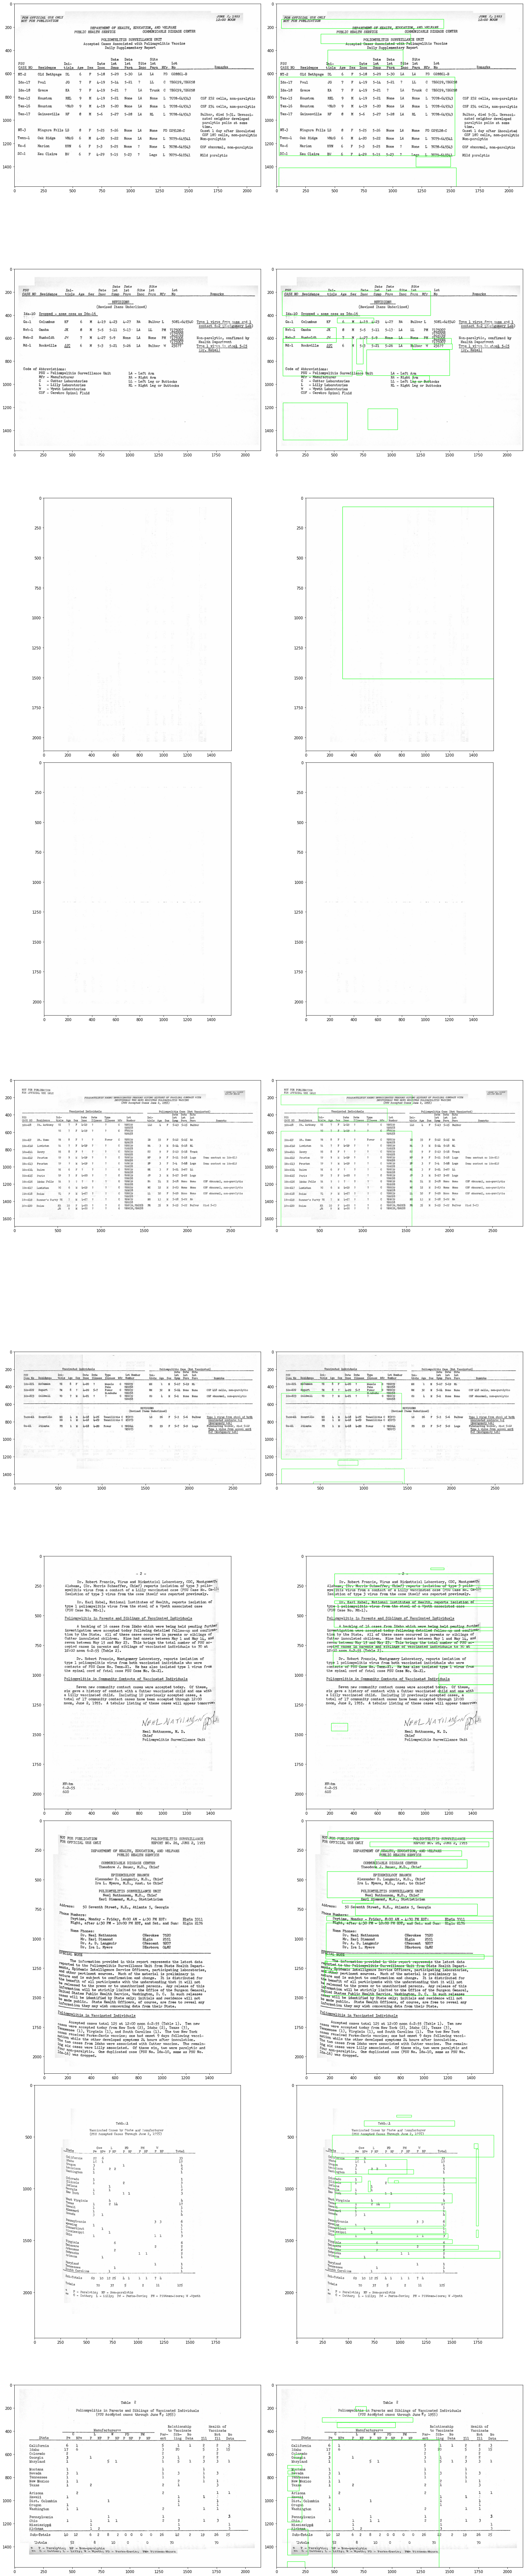

In [14]:
import os
import matplotlib.pyplot as plt
import cv2
from math import ceil, floor
import json
import numpy as np

pdf_path = input("Enter the path of the PDF: \n")
output_dir = input("Enter the path of the OCR Output Folder: \n")

if os.path.exists(pdf_path):
  pdf_path = pdf_path.split("/")[-1]
  pdf_name = pdf_path.split(".pdf")[0]
  output_dir = output_dir + "/" + pdf_name

  img_dir = output_dir + "/" + "page_images"
  json_dir = output_dir + "/" + "output"

  imgs = []
  for i in os.listdir(img_dir):
    img_name = i.split(".jpg")[0]
    image = cv2.imread(img_dir + "/" + i)
    bbox_image = np.copy(image)
    imgs.append(image)
    json_name = json_dir + "/" + img_name + "_ocr_tasks.json"
    if os.path.exists(json_name):
      f = open(json_name)
      d = json.load(f)
      for i in range(len(d["predictions"][0]["result"])):
        if i%2==0:
          x = floor((d["predictions"][0]["result"][i]["value"]["x"] * image.shape[0]) / 100)
          y = floor((d["predictions"][0]["result"][i]["value"]["y"] * image.shape[1]) / 100)
          width = floor((d["predictions"][0]["result"][i]["value"]["width"] * image.shape[0]) / 100)
          height = floor((d["predictions"][0]["result"][i]["value"]["height"] * image.shape[1]) / 100)
          bbox_image = cv2.rectangle(bbox_image, (x,y), (x+width, y+height), (0, 255, 0), 2)
      imgs.append(bbox_image)

  r = ceil(len(imgs)/2)
  c = 2

  fig, axs = plt.subplots(r, c, figsize=(20, 100))
  fig.subplots_adjust(hspace = 0, wspace=0)

  axs = axs.ravel()
  for i in range(0, len(imgs), 2):
    axs[i].imshow(imgs[i])
    axs[i+1].imshow(imgs[i+1])
      
  plt.tight_layout()
  plt.show()